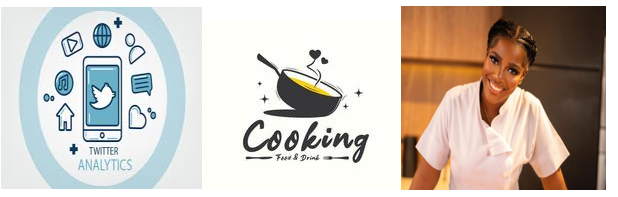

**Project Overview:**
The project comprises three primary components:

1. **Twitter Scraping:**
   - Utilizing the Twitter API, tweets that include the **#Hilda** hashtag from (13/05/2023-17/05/2023) were scraped 
   - The scraped tweets were saved as a CSV file to facilitate subsequent analysis.
2. **Data cleaning:**
    - The data was cleaned prior to analysis
    - Nan values, unnecessary space, url, and unnecessary characters
2. **Data Visualization:**
   - Leveraging Python's data analysis libraries, I conducted exploratory data analysis (EDA) on the collected tweets.
   - Key insights derived from the analysis included:
     - Identification of frequently used words or phrases in the tweets.
     - Assessment of the sentiment expressed in the tweets, classifying them as positive, neutral, or negative.
     - Identification of the most influential Twitter users based on various metrics.

In [1]:
#pip install git+https://github.com/JustAnotherArchivist/snscrape.git 
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sntwitter
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from wordcloud import WordCloud
import warnings
warnings.simplefilter("ignore")

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


#### Scraping the data from Twitter
**#Hilda**
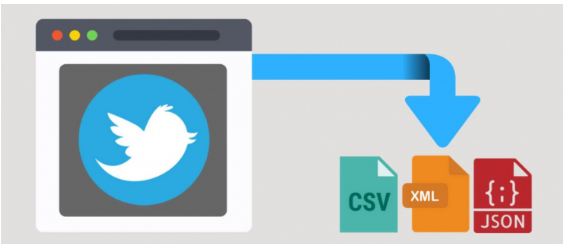

In [ ]:
attributes_container = []

n_tweets = 2000


for i, tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper("#Hilda since:2023-05-12 until:2023-05-17'").get_items()), total = n_tweets):
    if i> n_tweets:
        break
    attributes_container.append([
            tweet.id, 
            tweet.content,
            tweet.date,
            tweet.user.username,
            tweet.user.displayname,
            tweet.user.location,
            tweet.retweetCount,
            tweet.likeCount,
            tweet.lang,
            tweet.source])
    
    
    
# Creating a dataframe from the tweets list above 
df= pd.DataFrame(attributes_container, columns=["id","content", "timestamp","username", "userdisplayname", "userlocation","retweetCount",
          "likeCount", "language", "source"])

In [3]:
df.head()

,id,content,timestamp,username,userdisplayname,userlocation,retweetCount,likeCount,language,source
0,1658623362199871492,#100hrs #FYP #InterMilan #Hilda https://t.co/q...,2023-05-16 23:59:59+00:00,Shakipy_,Shakipy,Lagos,1,2,qme,None
1,1658618355161391110,Congratulations To Hilda Bassey\nThank You For...,2023-05-16 23:40:06+00:00,obahypeofficial,Oba Hype Of Africa,"Accra, Ghana",0,1,en,None
2,1658617314806251521,Congrats To Hilda Bassey\nThank for putting Ni...,2023-05-16 23:35:58+00:00,hypeafrobeatz,HypeAfroBeatz Promotions,New Africa,0,2,en,None
3,1658615881717497858,Age gracefully Sir.\n\nBest wishes always llnp...,2023-05-16 23:30:16+00:00,PrincekoladeB,Princekolade balo,,0,3,en,None
4,1658614156751151106,Congratulations Gurl U Deserve it\n\n#Hilda #H...,2023-05-16 23:23:25+00:00,MagajiWorld,Jobless Man,,0,0,en,None


In [4]:
df.shape

(2001, 10)

#### Data cleaning

In [5]:
df.isna().sum()

id                    0
content               0
timestamp             0
username              0
userdisplayname       0
userlocation          0
retweetCount          0
likeCount             0
language              0
source             2001
dtype: int64

In [6]:
#removing the source column 
df = df.drop('source', axis = 1)

In [7]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Print the number of duplicate rows
print(len(duplicates))

# Drop the duplicate rows
df = df.drop_duplicates()

# Print the updated DataFrame
df.shape

5


(1996, 9)

In [8]:
# to check for the data types
df.dtypes

id                               int64
content                         object
timestamp          datetime64[ns, UTC]
username                        object
userdisplayname                 object
userlocation                    object
retweetCount                     int64
likeCount                        int64
language                        object
dtype: object

**Cleaning the Tweet**

In [9]:
def clean_text(text):
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    
    # Remove URL links
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove other unnecessary characters
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Example usage
df['cleaned_content'] = df['content'].apply(clean_text)

In [10]:
df.cleaned_content[:10]

0                                                     
1    Congratulations To Hilda Bassey Thank You For ...
2    Congrats To Hilda Bassey Thank for putting Nig...
3    Age gracefully Sir Best wishes always llnp dav...
4                    Congratulations Gurl U Deserve it
5    Anyone who can solve this problem is considere...
6    yabaleftonline MrFaithful of Rivers state Ogon...
7    MrFaithful of Rivers state Ogoni is here to br...
8                                        Such a talent
9                                               Source
Name: cleaned_content, dtype: object

## Data Visualization

**Most Used Words**

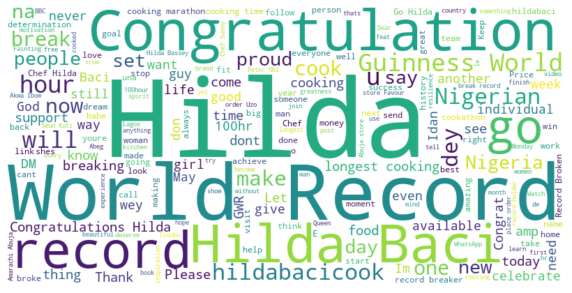

In [11]:
# Combine all the cleaned content into a single string
cleaned_text = ' '.join(df['cleaned_content'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Users' Location**

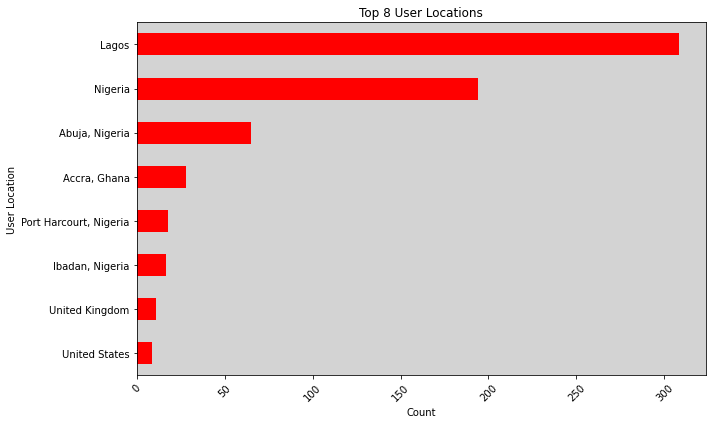

In [12]:
# Merge different variations of "Lagos" into a single category
df['userlocation'] = df['userlocation'].replace({'Lagos, Nigeria': 'Lagos', 'Lagos Nigeria': 'Lagos'})

# Filter out "Earth" and "World" from the DataFrame
filtered_df = df.loc[~df['userlocation'].isin(['Earth', 'World'])]


top_8_locations = filtered_df['userlocation'].value_counts().head(8)

# Filter the top 10 locations
#top_10_locations = df['userlocation'].value_counts().iloc[1:11]


# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_8_locations.plot(kind='barh', color='red')
plt.xlabel('Count')
plt.ylabel('User Location')
plt.title('Top 8 User Locations')
plt.xticks(rotation=45)
# Set the background color
plt.gca().invert_yaxis()
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show()

**Language Distribution**

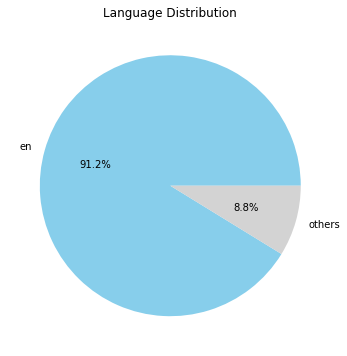

In [13]:
# Get the language counts
language_counts = df['language'].value_counts()

# Create a list for the pie chart labels and sizes
labels = ['en', 'others']
sizes = [language_counts['en'], language_counts.sum() - language_counts['en']]

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgray'])

# Set chart title
plt.title('Language Distribution')

plt.show()


**User Name Distribution**

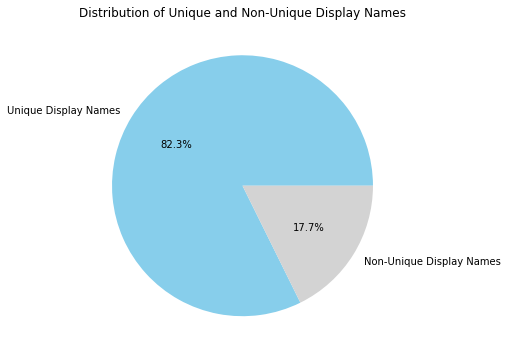

In [14]:
unique_display_names = df['userdisplayname'].nunique()
total_records = len(df)

# Calculate the percentage of unique display names
percentage_unique = (unique_display_names / total_records) * 100

# Calculate the percentage of non-unique display names
percentage_non_unique = 100 - percentage_unique

# Plot a pie chart
labels = ['Unique Display Names', 'Non-Unique Display Names']
sizes = [percentage_unique, percentage_non_unique]
colors = ['skyblue', 'lightgray']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Unique and Non-Unique Display Names')
plt.show()

**Username By Like Counts**

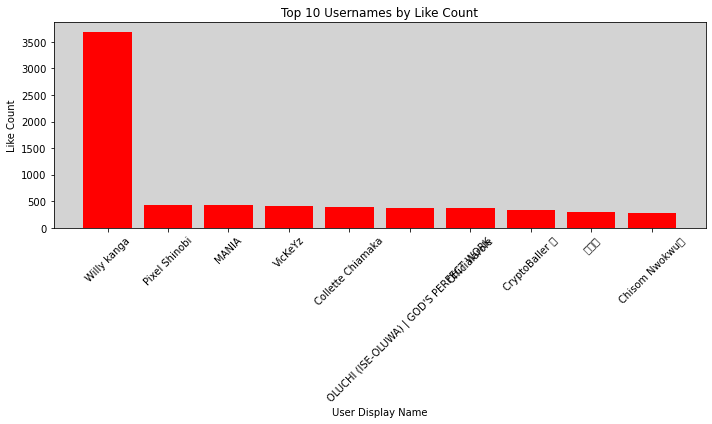

In [15]:
top_username_likecount = df.groupby('userdisplayname')['likeCount'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
plt.bar(top_username_likecount.index, top_username_likecount.values, color='red')
plt.xticks(rotation=45)

# Set the background color
plt.gca().set_facecolor('lightgray')

plt.xlabel('User Display Name')
plt.ylabel('Like Count')
plt.title('Top 10 Usernames by Like Count')
plt.tight_layout()
plt.show()

**Username By Retweet Counts**

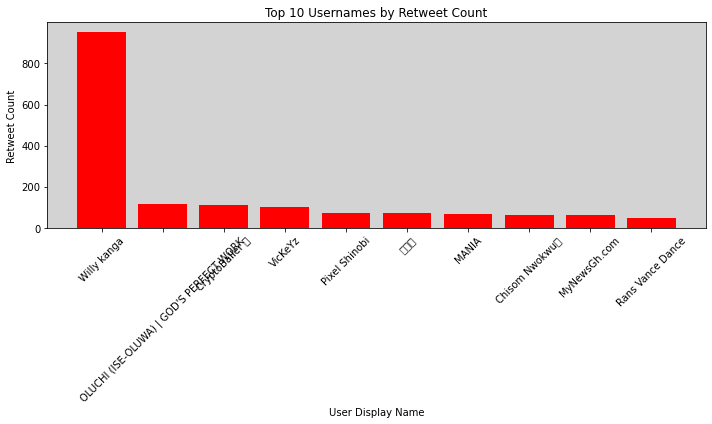

In [16]:
top_username_retweetcount = df.groupby('userdisplayname')['retweetCount'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
plt.bar(top_username_retweetcount.index, top_username_retweetcount.values, color='red')
plt.xticks(rotation=45)

# Set the background color
plt.gca().set_facecolor('lightgray')

plt.xlabel('User Display Name')
plt.ylabel('Retweet Count')
plt.title('Top 10 Usernames by Retweet Count')
plt.tight_layout()
plt.show()

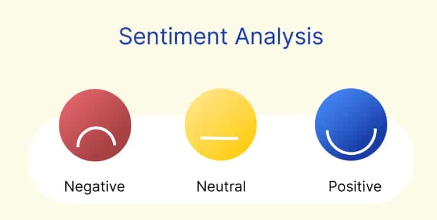

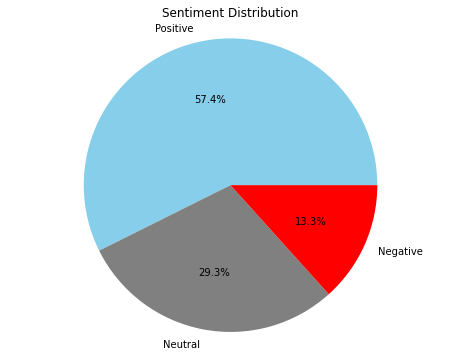

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the tweet content
df['sentiment_scores'] = df['cleaned_content'].apply(lambda x: sid.polarity_scores(x))
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Classify sentiment as positive, neutral, or negative
df['sentiment'] = df['compound_score'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))
sentiment_counts = df['sentiment'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

**But She's Amazing! why negative?**

In [24]:
# Sort the DataFrame by compound_score in ascending order
df_sorted = df.sort_values('compound_score')

# Filter for the most negative tweets that contain the word 'Hilda'
most_negative_tweets = df_sorted[df_sorted['cleaned_content'].str.contains('Hilda')].head(5)

# Print the most negative tweets
for index, tweet in most_negative_tweets.iterrows():
    print(tweet['cleaned_content'])
    print('------------------------')

No one is talking about the fact that we didnt hear anything like Hilda cut herself with a Knife or She Burnt her finger or She poured something hot on herself or even a pot of food falling out of her weak hands Even with the level of stress she is undergoing
------------------------
Stop the negative post about Hilda yall just jealous of her
------------------------
Hilda has become synonymous with Cooking so anytime you want to say cook just say Hilda Example 1 Agba Hildaed all the boys and girls this morning 2 BOD was Hildaed for always stealing tweets 3 Ill be Hildaing beans this morning
------------------------
The next time I tell you that Im lazy to cook and you compare me to Hilda remember that Im a teen she started training 6 years ago I was still a kid and my mom would be following to the gym No pressure gang
------------------------
The statement no b your mate dey do this so and so for their girlfriend your mate suppose don get car and house your mate yen yen yen Small comp

**Positive Words**

In [25]:
# Filter for the most negative tweets that contain the word 'Hilda'
most_Positive_tweets = df_sorted[df_sorted['cleaned_content'].str.contains('Hilda')].tail(5)

# Print the most negative tweets
for index, tweet in most_Positive_tweets.iterrows():
    print(tweet['cleaned_content'])
    print('------------------------')

Inspiring motivating Achieving goalswe have drawn inspiration from Hilda some people spend 30 60 74 days and they get the best gifts Na make contribution start make she get this kind gifts not just your prayers
------------------------
Hilda I must say you have shown the true definition of what determination discipline focus and goal setting is You are an inspiration to success story Thank ypu for bringing unity in a different concept God bless you
------------------------
What a proud moment for Hildas mom Feels good to know that you birthed someone who can work nonstop to achieve their dreams Little or big winsmay we always make our parents proud I love people who can go beyond their limits to achieve things Hilda is an inspiration
------------------------
Breaking a Guinness World Record is no small feat and we are truly inspired by your remarkable accomplishment Your recordbreaking achievement serves as a shining example of what can be accomplished with passion determination and ha

In [26]:
#saving the cleaned data to csv for further analysis
df.to_csv('Hilda_tweet.csv', index= False)